# **Credit Card Fraud Detection with Decision Trees and SVM**


I will be using two popular classification models to identify fraudulent credit card transactions. These models are: Decision Trees and Support Vector Machine. I will use a real dataset of credit card transactions to train each of these models. I will then use the trained model to assess if a credit card transaction is fraudulent or not.


<div id="Introduction">
    <h2>Introduction</h2>
    <br>This project is applicable to financial institutions as the aim is to build a model that predicts if a credit card transaction is fraudulent or not. This can be modelled as a binary classification problem. A transaction belongs to the positive class (1) if it is a fraud, otherwise it belongs to the negative class (0).
    <br>
    <br>The data is transactions that occured over a certain period of time. The majority of the transactions are normally legitimate and only a small fraction are non-legitimate this means the dataset is highly unbalanced. There are only 492 fraudulent transactions out of 284,807 records thus 0.172% of all transactions.
    <br>
    <br>This is a Kaggle dataset. This "Credit Card Fraud Detection" dataset is from the following link: <a href="https://www.kaggle.com/mlg-ulb/creditcardfraud">Credit Card Fraud Detection</a>.
<br>
    <br>To train the model, part of the input dataset is used while the remaining data can be utilized to assess the quality of the trained model.
    <br>
</div>


<div id="import_libraries">
    <h2>Import Libraries</h2>
</div>


In [ ]:
#!pip install pandas==2.2.3
#!pip install scikit-learn==1.6.0
#!pip install matplotlib==3.9.3

In [1]:
# Importing the libraries needed to use in this lab
from __future__ import print_function
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.svm import LinearSVC

import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [3]:

path= "creditcard.csv" 

# read the input data
raw_data=pd.read_csv(path)
raw_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


<div id="dataset_analysis">
    <h2>Dataset Analysis</h2>
</div>


Each row in the dataset represents a credit card transaction. As shown above, each row has 31 variables. One variable (the last variable in the table above) is called Class and represents the target variable. The objective will be to train a model that uses the other variables to predict the value of the Class variable.

For confidentiality reasons, the original names of most features are anonymized V1, V2 .. V28. The values of these features are the result of a PCA transformation and are numerical. The feature 'Class' is the target variable and it takes two values: 1 in case of fraud and 0 otherwise. For more information about the dataset please visit this webpage: https://www.kaggle.com/mlg-ulb/creditcardfraud.


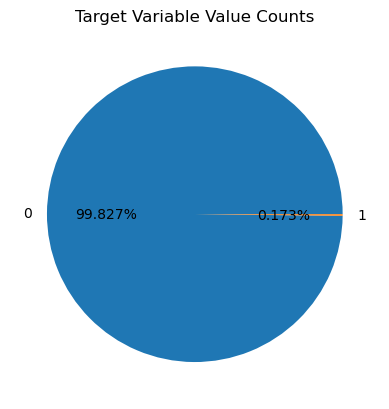

In [5]:
# get the set of distinct classes
labels = raw_data.Class.unique()

# get the count of each class
sizes = raw_data.Class.value_counts().values

# plot the class value counts
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.3f%%')
ax.set_title('Target Variable Value Counts')
plt.show()

As shown above, the Class variable has two values: 0 (the credit card transaction is legitimate) and 1 (the credit card transaction is fraudulent). The dataset is highly unbalanced, the target variable classes are not represented equally. This case requires special attention when training or when evaluating the quality of a model. One way of handling this case at train time is to bias the model to pay more attention to the samples in the minority class. The models under the current study will be configured to take into account the class weights of the samples at train/fit time.


To see which features affect the model in what way, we can visualize the effect of the different features on the model

In [9]:
correlation_values = raw_data.corr()['Class'].drop('Class')
correlation_values.plot(kind='barh', figsize=(10, 6))

<Axes: >

Some features affect the output Class more than the others. For efficient modeling, we may use only the most correlated features. This will be explored later.

In [11]:
correlation_values = abs(raw_data.corr()['Class']).drop('Class')
correlation_values = correlation_values.sort_values(ascending=False)[:6]
correlation_values

V17    0.326481
V14    0.302544
V12    0.260593
V10    0.216883
V16    0.196539
V3     0.192961
Name: Class, dtype: float64

<div id="dataset_preprocessing">
    <h2>Dataset Preprocessing</h2>
</div>


To prepare the data for training, I will apply standard scaling to the input features and normalize them using $L_1$ norm for the training models to converge quickly. As seen in the data snapshot, there is a parameter called `Time` which will not be considered for modeling. Hence, features 2 to 30 will be used as input features and feature 31, i.e. Class will be used as the target variable.


In [16]:
# standardize features by removing the mean and scaling to unit variance
raw_data.iloc[:, 1:30] = StandardScaler().fit_transform(raw_data.iloc[:, 1:30])
data_matrix = raw_data.values

# X: feature matrix (for this analysis, we exclude the Time variable from the dataset)
X = data_matrix[:, 1:30]

# y: labels vector
y = data_matrix[:, 30]

# data normalization
X = normalize(X, norm="l1")

<div id="dataset_split">
    <h2>Dataset Train/Test Split</h2>
</div>


Now that the dataset is ready for building the classification models, I need to first divide the pre-processed dataset into a subset to be used for training the model (the train set) and a subset to be used for evaluating the quality of the model (the test set).


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<div id="dt_sklearn">
    <h2>Building a Decision Tree Classifier model with Scikit-Learn</h2>
</div>


The sample weights to be used as input to the train routine so that it takes into account the class imbalance present in this dataset.


In [23]:
w_train = compute_sample_weight('balanced', y_train)

Using these sample weights, we may train the Decision Tree classifier.This model can be compared against SVM.

In [26]:
# for reproducible output across multiple function calls, set random_state to a given integer value
dt = DecisionTreeClassifier(max_depth=4, random_state=35)

dt.fit(X_train, y_train, sample_weight=w_train)

DecisionTreeClassifier(max_depth=4, random_state=35)

<div id="svm_sklearn">
    <h2>Building a Support Vector Machine model with Scikit-Learn</h2>
</div>


Unlike Decision Trees, There is no need to initiate a separate sample_weight for SVMs, the parameter can be passed in the scikit-learn function.


In [29]:
# for reproducible output across multiple function calls, set random_state to a given integer value
svm = LinearSVC(class_weight='balanced', random_state=31, loss="hinge", fit_intercept=False)

svm.fit(X_train, y_train)

LinearSVC(class_weight='balanced', fit_intercept=False, loss='hinge',
          random_state=31)

<div id="dt_sklearn_snapml">
    <h2>Evaluating the Decision Tree Classifier Models</h2>
</div>


Calculating the probabilities of the test samples belonging to the class of fraudulent transactions. 


In [33]:
y_pred_dt = dt.predict_proba(X_test)[:,1]

Using these probabilities, we can evaluate the Area Under the Receiver Operating Characteristic Curve (ROC-AUC) score as a metric of model performance. 
The AUC-ROC score evaluates the model's ability to distinguish positive and negative classes considering all possible probability thresholds. The higher its value, the better the model is considered for separating the two classes of values.


In [37]:
roc_auc_dt = roc_auc_score(y_test, y_pred_dt)
print('Decision Tree ROC-AUC score : {0:.3f}'.format(roc_auc_dt))

Decision Tree ROC-AUC score : 0.939


<div id="svm_sklearn_snap">
    <h2>Evaluating the Support Vector Machine Models</h2>
</div>


Calculating the probabilities of the test samples belonging to the class of fraudulent transactions. 


In [41]:
y_pred_svm = svm.decision_function(X_test)

Evaluating the accuracy of SVM on the test set in terms of the ROC-AUC score.


In [44]:
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)
print("SVM ROC-AUC score: {0:.3f}".format(roc_auc_svm))

SVM ROC-AUC score: 0.986


# Using only the 6 most correlated features for the models

In [65]:
Xcorr = data_matrix[:,[3,10,12,14,16,17]]

# data normalization
Xcorr = normalize(Xcorr, norm="l1")

In [67]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(Xcorr, y, test_size=0.3, random_state=42)

In [69]:
w_train1 = compute_sample_weight('balanced', y_train1)

In [71]:
dt1 = DecisionTreeClassifier(max_depth=4, random_state=35)
dt1.fit(X_train1, y_train1, sample_weight=w_train1)

DecisionTreeClassifier(max_depth=4, random_state=35)

In [72]:
svm1 = LinearSVC(class_weight='balanced', random_state=31, loss="hinge", fit_intercept=False)
svm1.fit(X_train1, y_train1)

LinearSVC(class_weight='balanced', fit_intercept=False, loss='hinge',
          random_state=31)

In [75]:
y_pred_dt1 = dt1.predict_proba(X_test1)[:,1]

In [77]:
roc_auc_dt1 = roc_auc_score(y_test1, y_pred_dt1)
print('First Decision Tree ROC-AUC score : {0:.3f}'.format(roc_auc_dt))
print('Second Decision Tree ROC-AUC score : {0:.3f}'.format(roc_auc_dt1))

First Decision Tree ROC-AUC score : 0.939
Second Decision Tree ROC-AUC score : 0.952


In [79]:
y_pred_svm1 = svm1.decision_function(X_test1)

In [83]:
roc_auc_svm1 = roc_auc_score(y_test, y_pred_svm1)
print("SVM ROC-AUC score: {0:.3f}".format(roc_auc_svm))
print("SVM ROC-AUC score: {0:.3f}".format(roc_auc_svm1))

SVM ROC-AUC score: 0.986
SVM ROC-AUC score: 0.937


With a larger set of features, SVM performed relatively better in comparison to the Decision Trees. Decision Trees benefited from feature selection and performed better.
SVMs may require higher feature dimensionality to create an efficient decision hyperplane.